In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [25]:
from pybeerxml.parser import Parser

In [91]:
ogs = []
fgs = []
yeasts = set()
malts = set()

parser = Parser()

for dirpath, dirnames, files in os.walk('./data/10'):
    for file_name in files:
        file_path = str(os.path.join(dirpath, file_name))
        try:
            recipes = parser.parse(file_path)
        except:
            print("Erroneous file found, removing: " + file_path)
            os.remove(file_path)
        recipe = recipes[0]
        ogs.append(recipe.og)
        fgs.append(recipe.fg)
        
        yeasts.update([y.name for y in recipe.yeasts])
        malts.update([m.name for m in recipe.fermentables if m.type.lower() == "grain"])

In [92]:
malts

{' Amber',
 ' American - Caramel / Crystal 60L',
 ' American - Carapils (Dextrine Malt)',
 ' Biscuit',
 ' Bonlander Munich Malt 10L',
 ' Caramel Malt - 40L',
 ' Caramunich Type 1',
 ' Crystal Malt',
 ' Dark Crystal Malt',
 ' Domestic 2-Row',
 ' German - CaraMunich II',
 ' Golden Promise',
 ' Munich Schooner',
 ' Munich Type I',
 ' Standard 2-Row',
 ' Veloria Schooner',
 ' Winter Wheat Janz',
 '2 Track 2 Row',
 '2 row',
 '2-Row (US)',
 '2-Row Malt',
 '2-Row Pale',
 '2-row',
 '3.3 lb LME adjusted for percentages',
 '6-Row Malt',
 'Abbey Malt',
 'Acid malt',
 'Acidulated (Weyermann)',
 'Acidulated Malt',
 'Acidulated Malt ',
 'Admiral Maltings Pale 2-Row',
 'Ale Malt',
 "Alexander's Pale Malt",
 "Alexander's Pale Malt Extract",
 'Amber',
 'American - Caramel / Crystal 45L',
 'American - Caramel / Crystal 60L',
 'American - Caramel Rye 60L',
 'American - Oak Smoked Wheat',
 'American 2-row',
 'American Ale Malt',
 'American Carapils',
 'American Crystal 40',
 'American Crystal 60L',
 'Amer

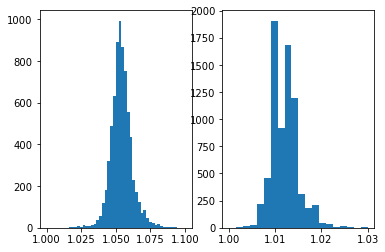

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(ogs, bins=50, range=(1.0, 1.1));
ax2.hist(fgs, bins=20, range=(1.0, 1.03));

In [86]:
ogs = np.array(ogs)
fgs = np.array(fgs)
print(ogs.mean(), ogs.std())
print(fgs.mean(), fgs.std())

1.053665150888797 0.009690755932266558
1.0119204905608377 0.0032176378292414834


In [88]:
n_ogs = (ogs - ogs.mean()) / ogs.std()
n_fgs = (fgs - fgs.mean()) / fgs.std()
print(n_ogs.mean(), n_ogs.std())
print(n_fgs.mean(), n_fgs.std())

-7.0745852793642054e-15 1.0
3.3299653359791936e-14 1.0
